In [1]:
# Task 1
import pandas as pd
import torch
import numpy as np
from matplotlib import pyplot as plt

student = pd.read_csv('p01_input.csv',encoding = 'cp949')

status = student[['키','몸무게']].dropna()

height = torch.FloatTensor(status['키'])
weight = torch.FloatTensor(status['몸무게'])

In [2]:
# Task 2
mean_height = torch.mean(height)
mean_weight = torch.mean(weight)

print(mean_height, mean_weight)

tensor(154.5648) tensor(50.2076)


In [3]:
# Task 3
def pearson_similarity(height, weight):
  height_c = height - mean_height
  weight_c = weight - mean_weight
  denom = np.sqrt(torch.sum(height_c ** 2) * torch.sum(weight_c ** 2))
  if denom != 0:
    return torch.sum(height_c * weight_c) / denom
  else:
    return 0

print(pearson_similarity(height, weight))

tensor(0.8490)


In [10]:
# Task 4
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.00000105
lr2 = 0.1

# 가설 함수
def hypothesis(height, W, b):
  hypo = height * W + b
  return hypo

# 비용 함수
def MSE(hypothesis, weight):
  cost = torch.mean((hypothesis - weight) ** 2)
  return cost

# cost를 W로 미분
def W_grad(hypo, weight, height):
  diff = -2 * torch.mean((weight - hypo) * height)
  return diff

# cost를 b로 미분
def b_grad(hypo, weight):
  diff = -2 * torch.mean(weight - hypo)
  return diff

for epoch in range(20000):
  W.requires_grad_(True)
  b.requires_grad_(True)
  
  hypo = hypothesis(height, W, b)
  cost = MSE(hypo, weight)
  # hypo = torch.mm(W,height) + b
  # cost = torch.mean((hypo - weight) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    # W = W - lr * W.grad
    # b = b - lr * b.grad
    W = W - lr * W_grad(hypo, weight, height)
    b = b - lr2 * b_grad(hypo, weight)

print('cost: {:.6f}, W: {}, b: {}' .format(cost.item(), W.squeeze(), b))

cost: 81.399826, W: 0.8541733026504517, b: tensor([[-81.8175]])


In [11]:
hypo = torch.squeeze(hypo)

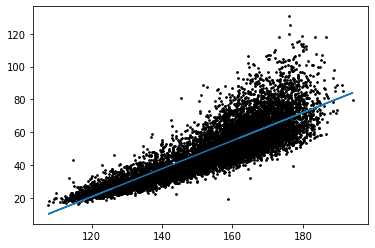

In [12]:
# Task 5
plt.plot(height, hypo.detach().numpy())
plt.scatter(height, weight, color='black', marker='o', s=3)
plt.show()